In [1]:
# %matplotlib inline
import matplotlib
#matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from cpselect.cpselect import cpselect
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage import transform
from skimage.draw import polygon

## Image Warping and Mosaics

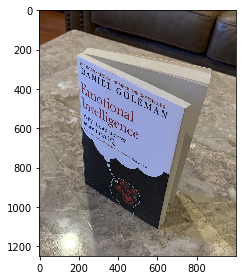

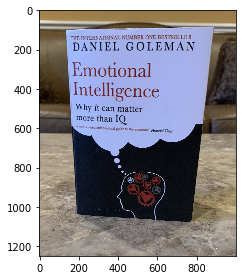

In [2]:
angled_book = "pt1_images/angled_book2.jpeg"
im1 = skio.imread(angled_book)

flat_book = "pt1_images/flat_book2.jpeg"
im2 = skio.imread(flat_book)

# convert to double (might want to do this later on to save memory)    
im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)
skio.imshow(im1)
skio.show()
skio.imshow(im2)
skio.show()

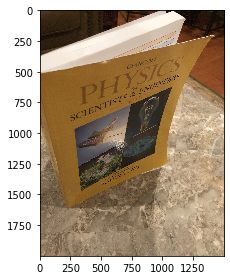

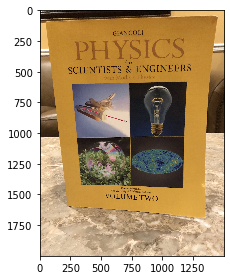

In [3]:
angled_physics = "pt1_images/angled_physics.jpeg"
im3 = skio.imread(angled_physics)

flat_physics = "pt1_images/flat_physics.jpeg"
im4 = skio.imread(flat_physics)


im3 = sk.img_as_float(im3)
im4 = sk.img_as_float(im4)
# convert to double (might want to do this later on to save memory)    

skio.imshow(im3)
skio.show()
skio.imshow(im4)
skio.show()

In [4]:
book_controlpointlist = [{'point_id': 1, 'img1_x': 190.85082604470364, 'img1_y': 228.27318629315073, 'img2_x': 141.1867368065241, 'img2_y': 100.458085097393}, {'point_id': 2, 'img1_x': 230.35731186884695, 'img1_y': 883.6160687877637, 'img2_x': 189.98886635399526, 'img2_y': 1032.346368361009}, {'point_id': 3, 'img1_x': 739.2938057210463, 'img1_y': 497.84685426965825, 'img2_x': 882.5143237419195, 'img2_y': 84.1907085815692}, {'point_id': 4, 'img1_x': 602.1830608019607, 'img1_y': 1111.3593400092957, 'img2_x': 773.2905099928173, 'img2_y': 1074.1767651159844}, {'point_id': 5, 'img1_x': 214.08993535302324, 'img1_y': 370.0317530739004, 'img2_x': 171.39757890733972, 'img2_y': 265.45576118646227}, {'point_id': 6, 'img1_x': 218.73775721468715, 'img1_y': 416.5099716905396, 'img2_x': 176.04540076900366, 'img2_y': 332.849178180589}, {'point_id': 7, 'img1_x': 218.73775721468715, 'img1_y': 488.55121054633037, 'img2_x': 180.6932226306676, 'img2_y': 428.12952634469946}, {'point_id': 8, 'img1_x': 218.73775721468715, 'img1_y': 593.1272024337686, 'img2_x': 171.39757890733972, 'img2_y': 588.4793805721047}, {'point_id': 9, 'img1_x': 660.2808340727596, 'img1_y': 834.8139392402924, 'img2_x': 831.3882832636161, 'img2_y': 579.1837368487768}, {'point_id': 10, 'img1_x': 272.18770862382223, 'img1_y': 660.5206194278954, 'img2_x': 271.325748933114, 'img2_y': 637.2815101195758}, {'point_id': 11, 'img1_x': 390.70716609625225, 'img1_y': 751.1531457303419, 'img2_x': 450.2668906071749, 'img2_y': 667.4923522203912}, {'point_id': 12, 'img1_x': 504.57880170701833, 'img1_y': 802.279186208645, 'img2_x': 619.9123885579079, 'img2_y': 653.5488866353995}, {'point_id': 13, 'img1_x': 348.87676934127694, 'img1_y': 760.4487894536697, 'img2_x': 387.5212954747119, 'img2_y': 723.2662145603583}, {'point_id': 14, 'img1_x': 353.5245912029409, 'img1_y': 788.3357206236532, 'img2_x': 399.14085012887176, 'img2_y': 760.4487894536697}, {'point_id': 15, 'img1_x': 381.41152237292437, 'img1_y': 844.1095829636203, 'img2_x': 440.971246883847, 'img2_y': 832.4900283094605}, {'point_id': 16, 'img1_x': 355.8485021337728, 'img1_y': 899.8834453035872, 'img2_x': 396.8169391980398, 'img2_y': 946.3616639202265}, {'point_id': 17, 'img1_x': 374.4397895804285, 'img1_y': 944.0377529893946, 'img2_x': 436.3234250221831, 'img2_y': 1011.4311699835214}, {'point_id': 18, 'img1_x': 448.80493936705125, 'img1_y': 957.9812185743863, 'img2_x': 543.2233278404533, 'img2_y': 953.3333967127223}, {'point_id': 19, 'img1_x': 427.8897409895636, 'img1_y': 881.2921578569317, 'img2_x': 513.0124857396379, 'img2_y': 851.0813157561162}, {'point_id': 20, 'img1_x': 481.3396923986987, 'img1_y': 920.798643681075, 'img2_x': 592.0254573879245, 'img2_y': 860.3769594794439}, {'point_id': 21, 'img1_x': 513.8744454303461, 'img1_y': 971.9246841593781, 'img2_x': 640.8275869353956, 'img2_y': 918.474732750243}, {'point_id': 22, 'img1_x': 474.3679596062028, 'img1_y': 1002.1355262601935, 'img2_x': 585.0537245954285, 'img2_y': 1009.1072590526894}, {'point_id': 23, 'img1_x': 214.08993535302324, 'img1_y': 293.3426923564457, 'img2_x': 178.36931169983563, 'img2_y': 167.85150209151993}, {'point_id': 24, 'img1_x': 365.1441458571007, 'img1_y': 400.2425951747159, 'img2_x': 406.1125829213677, 'img2_y': 193.4145223306714}, {'point_id': 25, 'img1_x': 444.1571175053873, 'img1_y': 430.4534372755313, 'img2_x': 515.3363966704696, 'img2_y': 181.79496767651153}, {'point_id': 26, 'img1_x': 650.9851903494318, 'img1_y': 521.0859635779779, 'img2_x': 787.2339755778091, 'img2_y': 163.203680229856}, {'point_id': 27, 'img1_x': 644.0134575569359, 'img1_y': 548.9728947479613, 'img2_x': 780.2622427853132, 'img2_y': 207.35798791566322}, {'point_id': 28, 'img1_x': 551.0570203236575, 'img1_y': 497.84685426965825, 'img2_x': 661.7427853128831, 'img2_y': 195.73843326150336}, {'point_id': 29, 'img1_x': 304.7224616554697, 'img1_y': 372.3556640047324, 'img2_x': 315.48005661892125, 'img2_y': 198.06234419233533}, {'point_id': 30, 'img1_x': 418.59409726623574, 'img1_y': 400.2425951747159, 'img2_x': 478.1538217771583, 'img2_y': 160.87976929902402}, {'point_id': 31, 'img1_x': 504.57880170701833, 'img1_y': 634.9575991887439, 'img2_x': 608.2928339037483, 'img2_y': 414.18606075970763}, {'point_id': 32, 'img1_x': 504.57880170701833, 'img1_y': 653.5488866353995, 'img2_x': 608.2928339037483, 'img2_y': 435.10125913719526}, {'point_id': 33, 'img1_x': 476.6918705370348, 'img1_y': 567.564182194617, 'img2_x': 571.1102590104367, 'img2_y': 337.4970000422529}, {'point_id': 34, 'img1_x': 479.01578146786676, 'img1_y': 514.1142307854819, 'img2_x': 566.4624371487728, 'img2_y': 265.45576118646227}, {'point_id': 35, 'img1_x': 376.7637005112605, 'img1_y': 497.84685426965825, 'img2_x': 424.7038703680232, 'img2_y': 311.93397980310147}, {'point_id': 36, 'img1_x': 344.228947479613, 'img1_y': 523.4098745088098, 'img2_x': 373.5778298897201, 'img2_y': 372.3556640047324}, {'point_id': 37, 'img1_x': 353.5245912029409, 'img1_y': 449.0447247221871, 'img2_x': 387.5212954747119, 'img2_y': 270.1035830481262}]
#cpselect(angled_book, flat_book)
print(book_controlpointlist)

[{'point_id': 1, 'img1_x': 190.85082604470364, 'img1_y': 228.27318629315073, 'img2_x': 141.1867368065241, 'img2_y': 100.458085097393}, {'point_id': 2, 'img1_x': 230.35731186884695, 'img1_y': 883.6160687877637, 'img2_x': 189.98886635399526, 'img2_y': 1032.346368361009}, {'point_id': 3, 'img1_x': 739.2938057210463, 'img1_y': 497.84685426965825, 'img2_x': 882.5143237419195, 'img2_y': 84.1907085815692}, {'point_id': 4, 'img1_x': 602.1830608019607, 'img1_y': 1111.3593400092957, 'img2_x': 773.2905099928173, 'img2_y': 1074.1767651159844}, {'point_id': 5, 'img1_x': 214.08993535302324, 'img1_y': 370.0317530739004, 'img2_x': 171.39757890733972, 'img2_y': 265.45576118646227}, {'point_id': 6, 'img1_x': 218.73775721468715, 'img1_y': 416.5099716905396, 'img2_x': 176.04540076900366, 'img2_y': 332.849178180589}, {'point_id': 7, 'img1_x': 218.73775721468715, 'img1_y': 488.55121054633037, 'img2_x': 180.6932226306676, 'img2_y': 428.12952634469946}, {'point_id': 8, 'img1_x': 218.73775721468715, 'img1_y': 

In [5]:
n_controlpointlist = [{'point_id': 1, 'img1_x': 279.5545062745595, 'img1_y': 969.8701356318923, 'img2_x': 260.8322347572571, 'img2_y': 600.3682976296107}, {'point_id': 2, 'img1_x': 736.2030041830398, 'img1_y': 767.6898846495117, 'img2_x': 731.4241982507292, 'img2_y': 589.9106984408668}, {'point_id': 3, 'img1_x': 1070.846178222842, 'img1_y': 624.7693624033461, 'img2_x': 1184.5868297629613, 'img2_y': 579.4530992521229}, {'point_id': 4, 'img1_x': 969.7560527316517, 'img1_y': 924.553872480669, 'img2_x': 1163.6716313854736, 'img2_y': 1029.1298643681073}, {'point_id': 5, 'img1_x': 931.4115223729244, 'img1_y': 1165.0786538217772, 'img2_x': 1163.6716313854736, 'img2_y': 1447.4338319178603}, {'point_id': 6, 'img1_x': 659.513943465585, 'img1_y': 1290.569844086703, 'img2_x': 745.367663835721, 'img2_y': 1423.0327671441246}, {'point_id': 7, 'img1_x': 331.84250221827864, 'img1_y': 1471.834896691596, 'img2_x': 334.03542907846395, 'img2_y': 1426.5186335403728}, {'point_id': 8, 'img1_x': 314.4131702370389, 'img1_y': 1269.6546457092154, 'img2_x': 299.1767651159844, 'img2_y': 1039.5874635568512}, {'point_id': 9, 'img1_x': 676.9432754468248, 'img1_y': 1067.4743947268346, 'img2_x': 734.9100646469769, 'img2_y': 1032.6157307643552}, {'point_id': 10, 'img1_x': 324.8707694257827, 'img1_y': 628.2552287995941, 'img2_x': 278.2615667384971, 'img2_y': 258.75339079731225}, {'point_id': 11, 'img1_x': 324.8707694257827, 'img1_y': 774.6616174420076, 'img2_x': 292.20503232348847, 'img2_y': 405.15977943972575}, {'point_id': 12, 'img1_x': 380.6446317657498, 'img1_y': 753.7464190645201, 'img2_x': 344.4930282672076, 'img2_y': 401.673913043478}, {'point_id': 13, 'img1_x': 460.8195588794524, 'img1_y': 624.7693624033461, 'img2_x': 393.295157814679, 'img2_y': 297.0979211560398}, {'point_id': 14, 'img1_x': 537.5086195969071, 'img1_y': 568.995500063379, 'img2_x': 456.04075294714175, 'img2_y': 255.2675244010643}, {'point_id': 15, 'img1_x': 610.7118139181139, 'img1_y': 544.5944352896436, 'img2_x': 508.3287488908609, 'img2_y': 251.78165800481634}, {'point_id': 16, 'img1_x': 530.5368868044113, 'img1_y': 697.972556724553, 'img2_x': 459.52661934338994, 'img2_y': 401.673913043478}, {'point_id': 17, 'img1_x': 593.2824819368742, 'img1_y': 677.0573583470652, 'img2_x': 518.7863480796045, 'img2_y': 394.7021802509821}, {'point_id': 18, 'img1_x': 631.6270122956015, 'img1_y': 663.1138927620734, 'img2_x': 574.5602104195718, 'img2_y': 391.21631385473415}, {'point_id': 19, 'img1_x': 680.4291418430727, 'img1_y': 523.6792369121558, 'img2_x': 581.5319432120677, 'img2_y': 248.2957916085686}, {'point_id': 20, 'img1_x': 736.2030041830398, 'img1_y': 506.24990493091605, 'img2_x': 640.7916719482828, 'img2_y': 241.3240588160727}, {'point_id': 21, 'img1_x': 781.519267334263, 'img1_y': 488.8205729496765, 'img2_x': 675.6503359107619, 'img2_y': 241.3240588160727}, {'point_id': 22, 'img1_x': 739.6888705792877, 'img1_y': 628.2552287995941, 'img2_x': 679.1362023070101, 'img2_y': 391.21631385473415}, {'point_id': 23, 'img1_x': 886.0952592217012, 'img1_y': 481.8488401571806, 'img2_x': 808.1132589681838, 'img2_y': 276.18272277855203}, {'point_id': 24, 'img1_x': 795.4627329192548, 'img1_y': 582.9389656483709, 'img2_x': 731.4241982507292, 'img2_y': 356.3576498922546}, {'point_id': 25, 'img1_x': 952.326720750412, 'img1_y': 446.99017619470123, 'img2_x': 895.259918874382, 'img2_y': 241.3240588160727}, {'point_id': 26, 'img1_x': 920.9539231841806, 'img1_y': 562.0237672708831, 'img2_x': 888.2881860818866, 'img2_y': 387.7304474584862}, {'point_id': 27, 'img1_x': 1084.7896438078337, 'img1_y': 408.6456458359737, 'img2_x': 1048.6380403092917, 'img2_y': 237.83819241982474}, {'point_id': 28, 'img1_x': 1046.4451134491064, 'img1_y': 492.30643934592445, 'img2_x': 1052.1239067055394, 'img2_y': 359.84351628850254}, {'point_id': 29, 'img1_x': 1056.90271263785, 'img1_y': 513.221637723412, 'img2_x': 1080.010837875523, 'img2_y': 387.7304474584862}, {'point_id': 30, 'img1_x': 1157.9928381290404, 'img1_y': 380.7587146659903, 'img2_x': 1167.1574977817218, 'img2_y': 234.35232602357678}, {'point_id': 31, 'img1_x': 251.66757510457597, 'img1_y': 872.2658765369499, 'img2_x': 229.4594371910257, 'img2_y': 471.3912409684367}, {'point_id': 32, 'img1_x': 251.66757510457597, 'img1_y': 914.0962732919252, 'img2_x': 236.4311699835216, 'img2_y': 523.6792369121558}, {'point_id': 33, 'img1_x': 373.6728989732539, 'img1_y': 813.0061478007349, 'img2_x': 334.03542907846395, 'img2_y': 467.90537457218875}, {'point_id': 34, 'img1_x': 380.6446317657498, 'img1_y': 854.8365445557104, 'img2_x': 337.5212954747117, 'img2_y': 516.7075041196599}, {'point_id': 35, 'img1_x': 669.9715426543289, 'img1_y': 704.9442895170489, 'img2_x': 623.3623399670428, 'img2_y': 457.4477753834449}, {'point_id': 36, 'img1_x': 530.5368868044113, 'img1_y': 795.5768158194953, 'img2_x': 480.4418177208772, 'img2_y': 513.221637723412}, {'point_id': 37, 'img1_x': 572.3672835593866, 'img1_y': 778.1474838382555, 'img2_x': 522.2722144758527, 'img2_y': 509.735771327164}, {'point_id': 38, 'img1_x': 812.8920649004945, 'img1_y': 645.6845607808339, 'img2_x': 783.7121941944483, 'img2_y': 460.93364177969283}, {'point_id': 39, 'img1_x': 809.4061985042465, 'img1_y': 684.0290911395612, 'img2_x': 783.7121941944483, 'img2_y': 509.735771327164}, {'point_id': 40, 'img1_x': 952.326720750412, 'img1_y': 593.3965648371147, 'img2_x': 961.491380403093, 'img2_y': 453.9619089871969}, {'point_id': 41, 'img1_x': 941.8691215616683, 'img1_y': 631.741095195842, 'img2_x': 958.0055140068453, 'img2_y': 502.7640385346683}, {'point_id': 42, 'img1_x': 1032.5016478641146, 'img1_y': 562.0237672708831, 'img2_x': 1073.0391050830272, 'img2_y': 453.9619089871969}, {'point_id': 43, 'img1_x': 1102.2189757890733, 'img1_y': 558.5379008746352, 'img2_x': 1198.5302953479531, 'img2_y': 495.7923057421724}, {'point_id': 44, 'img1_x': 1133.591773355305, 'img1_y': 520.1933705159079, 'img2_x': 1226.4172265179363, 'img2_y': 443.5043097984533}, {'point_id': 45, 'img1_x': 499.16408923817977, 'img1_y': 1409.089301559133, 'img2_x': 543.1874128533404, 'img2_y': 1496.2359614653315}, {'point_id': 46, 'img1_x': 572.3672835593866, 'img1_y': 1395.1458359741412, 'img2_x': 619.876473570795, 'img2_y': 1534.5804918240588}, {'point_id': 47, 'img1_x': 617.6835467106098, 'img1_y': 1346.34370642667, 'img2_x': 693.0796678920019, 'img2_y': 1499.7218278615794}, {'point_id': 48, 'img1_x': 690.8867410318165, 'img1_y': 1339.371973634174, 'img2_x': 790.6839269869442, 'img2_y': 1545.0380910128026}, {'point_id': 49, 'img1_x': 725.7454049942959, 'img1_y': 1297.5415768791988, 'img2_x': 842.9719229306634, 'img2_y': 1506.6935606540753}, {'point_id': 50, 'img1_x': 774.547534541767, 'img1_y': 1276.6263785017113, 'img2_x': 905.7175180631261, 'img2_y': 1510.1794270503233}, {'point_id': 51, 'img1_x': 791.9768665230068, 'img1_y': 1280.112244897959, 'img2_x': 944.0620484218534, 'img2_y': 1541.5522246165547}, {'point_id': 52, 'img1_x': 652.5422106730892, 'img1_y': 1008.2146659906198, 'img2_x': 672.1644695145142, 'img2_y': 893.1810749144377}, {'point_id': 53, 'img1_x': 544.480352389403, 'img1_y': 1032.6157307643552, 'img2_x': 543.1874128533404, 'img2_y': 854.8365445557104}, {'point_id': 54, 'img1_x': 373.6728989732539, 'img1_y': 1077.9319939155785, 'img2_x': 347.9788946634558, 'img2_y': 795.5768158194953}, {'point_id': 55, 'img1_x': 638.5987450880974, 'img1_y': 868.780010140702, 'img2_x': 623.3623399670428, 'img2_y': 670.0856255545693}, {'point_id': 56, 'img1_x': 425.960894916973, 'img1_y': 994.271200405628, 'img2_x': 400.2668906071749, 'img2_y': 718.8877551020405}, {'point_id': 57, 'img1_x': 889.5811256179492, 'img1_y': 792.0909494232474, 'img2_x': 958.0055140068453, 'img2_y': 725.8594878945364}, {'point_id': 58, 'img1_x': 840.778996070478, 'img1_y': 983.8136012168841, 'img2_x': 951.0337812143493, 'img2_y': 1018.6722651793634}, {'point_id': 59, 'img1_x': 948.8408543541641, 'img1_y': 1043.0733299530991, 'img2_x': 1167.1574977817218, 'img2_y': 1234.7959817467358}, {'point_id': 60, 'img1_x': 666.485676258081, 'img1_y': 1182.5079858030167, 'img2_x': 734.9100646469769, 'img2_y': 1227.82424895424}]
#cpselect(angled_physics, flat_physics)
#n_controlpointlist += new_pts
print(n_controlpointlist)

[{'point_id': 1, 'img1_x': 279.5545062745595, 'img1_y': 969.8701356318923, 'img2_x': 260.8322347572571, 'img2_y': 600.3682976296107}, {'point_id': 2, 'img1_x': 736.2030041830398, 'img1_y': 767.6898846495117, 'img2_x': 731.4241982507292, 'img2_y': 589.9106984408668}, {'point_id': 3, 'img1_x': 1070.846178222842, 'img1_y': 624.7693624033461, 'img2_x': 1184.5868297629613, 'img2_y': 579.4530992521229}, {'point_id': 4, 'img1_x': 969.7560527316517, 'img1_y': 924.553872480669, 'img2_x': 1163.6716313854736, 'img2_y': 1029.1298643681073}, {'point_id': 5, 'img1_x': 931.4115223729244, 'img1_y': 1165.0786538217772, 'img2_x': 1163.6716313854736, 'img2_y': 1447.4338319178603}, {'point_id': 6, 'img1_x': 659.513943465585, 'img1_y': 1290.569844086703, 'img2_x': 745.367663835721, 'img2_y': 1423.0327671441246}, {'point_id': 7, 'img1_x': 331.84250221827864, 'img1_y': 1471.834896691596, 'img2_x': 334.03542907846395, 'img2_y': 1426.5186335403728}, {'point_id': 8, 'img1_x': 314.4131702370389, 'img1_y': 1269.6

In [6]:
def correspondence_to_im_pts(controlpointlist):

    im1_pts = []
    im2_pts = []
    for i in range(len(controlpointlist)):
        correspondence = controlpointlist[i]
        im1_x, im1_y = correspondence["img1_x"], correspondence["img1_y"]
        im2_x, im2_y = correspondence["img2_x"], correspondence["img2_y"]
        im1_pts.append([im1_x, im1_y])
        im2_pts.append([im2_x, im2_y])
        
    return im1_pts, im2_pts

#compute compute_homography transformation matrix given correspondance 
#of two triangulations
def compute_homography(im1_pts, im2_pts):
        
    x1, y1 = im1_pts[0]
    x2, y2 = im2_pts[0]
    
    pts_matrix = np.matrix([
        [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2],
        [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2]
    ])
    
    b_matrix = np.matrix([
        [x2],
        [y2]
    ])
    
    for i in range(1, len(im1_pts)):
        
        x1, y1 = im1_pts[i]
        x2, y2 = im2_pts[i]
        
        next_rows = np.matrix([
            [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2],
            [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2]
        ])
        
        next_b = np.matrix([
            [x2],
            [y2]
        ])
        
        pts_matrix = np.vstack([pts_matrix, next_rows])
        b_matrix = np.vstack([b_matrix, next_b])
    
    pts, _, _, _ = np.linalg.lstsq(pts_matrix, b_matrix)
    
    a, b, c, d, e, f, g, h = pts
    
    a = a[0,0]
    b = b[0,0]
    c = c[0,0]
    d = d[0,0]
    e = e[0,0]
    f = f[0,0]
    g = g[0,0]
    h = h[0,0]
    
    return np.matrix([
        [a, b, c],
        [d, e, f],
        [g, h, 1]
    ])

In [7]:
def rectify_image(size, im1, H):
    h = np.linalg.inv(H)
    mask = np.zeros(size)

    for i in range(size[0]):

        x_coords = np.array([x for x in range(size[1])])
        y_coords = np.array([i for y in range(size[1])])
        ones = np.ones(size[1])

        matrix_ready_coords = np.vstack((x_coords, y_coords, ones))

        transformed_coords = np.dot(h, matrix_ready_coords)

        multiplier_vec = np.array(transformed_coords[2,:])

        #remove last row of homogenous coords
        transformed_coords = transformed_coords[:-1,] 

        transformed_coords = transformed_coords / multiplier_vec
        
        flat_transformed = np.array(transformed_coords)

        transformed_x_coords = np.clip(flat_transformed[0].astype(int), 0, size[1] - 1)
        transformed_y_coords = np.clip(flat_transformed[1].astype(int), 0, size[0] - 1)

        for index in range(size[2]):
            val = im1[transformed_y_coords, transformed_x_coords, index]
            mask[y_coords, x_coords, index] = val
            
    return mask

def rectify_homography(goal_im, orig_im, controlpointlist, flip=False, save_name=None):
    correspondence_pts = correspondence_to_im_pts(controlpointlist)
    if not flip:
        pts1, pts2 = correspondence_pts
    else:
        pts2, pts1 = correspondence_pts
    H = compute_homography(pts1, pts2)
    img = rectify_image(orig_im.shape, orig_im, H)
    
    if save_name:
        skio.imsave(save_name, img)
        print("Saved: ", save_name, "!")
    
    print("Original Image")
    skio.imshow(orig_im)
    skio.show()
    print("Output Image")
    skio.imshow(img)
    skio.show()
    print("Goal Image")
    skio.imshow(goal_im)
    skio.show()

    return img

In [8]:
def get_bounds(im1, H):
    
    x_coords = np.array([im1.shape[1], im1.shape[1], 0, 0])
    y_coords = np.array([im1.shape[0], 0, 0, im1.shape[0]])
    ones = np.ones(4)

    matrix_ready_coords = np.vstack((x_coords, y_coords, ones))
    
    transformed_coords = np.dot(H, matrix_ready_coords)

    multiplier_vec = np.array(transformed_coords[2,:])

    #remove last row of homogenous coords
    transformed_coords = transformed_coords[:-1,] 

    transformed_coords = transformed_coords / multiplier_vec

    flat_transformed = np.array(transformed_coords)

    x_min = min(flat_transformed[0])
    y_min = min(flat_transformed[1])
    x_max = max(flat_transformed[0])
    y_max = max(flat_transformed[1])
    
    translation_matrix = np.matrix([
        [1, 0, -x_min],
        [0, 1, -y_min],
        [0, 0, 1]
    ])
    
    transform_rdy_coords = np.vstack((flat_transformed, ones))
    
    regularized_bounding_box_coords = np.dot(translation_matrix, transform_rdy_coords)
    
    final_bounding_coords = np.array(regularized_bounding_box_coords[:-1,])
    
    final_bounding_coords[0] = final_bounding_coords[0].astype(int)
    final_bounding_coords[1] = final_bounding_coords[1].astype(int)
    
    return final_bounding_coords, translation_matrix

def fill_mask(im1, final_bounding_coords, translation_matrix, h_matrix):
    
    inv_translation = np.linalg.inv(translation_matrix)
    x = final_bounding_coords[0]
    y = final_bounding_coords[1]
    rr, cc = polygon(y, x)
    
    coords_in_tri = np.matrix(list(zip(cc, rr))).T
    num_coords = coords_in_tri.shape[1]
    
    matrix_ready_coords = np.vstack((coords_in_tri, np.ones(num_coords)))
    transformed_coords = np.dot(inv_translation, matrix_ready_coords)
    #remove last row of homogenous coords
    
    h_matrix_inv = np.linalg.inv(h_matrix)
    
    transformed_coords = np.dot(h_matrix_inv, transformed_coords)
    multiplier_vec = np.array(transformed_coords[2,:])
    #remove last row of homogenous coords
    transformed_coords = transformed_coords[:-1,] 
    transformed_coords = transformed_coords / multiplier_vec

    flat_transformed = np.array(transformed_coords)
    transformed_x_coords = flat_transformed[0].astype(int)
    transformed_y_coords = flat_transformed[1].astype(int)
    
    mask = np.zeros((max(rr) + 1, max(cc) + 1, im1.shape[2]))
    
    for index in range(im1.shape[2]):
        temp = im1[transformed_y_coords, transformed_x_coords, index]
        mask[rr, cc, index] = temp
                    
    return mask


In [90]:
def get_multi_bounds(im1, H):
    
    x_coords = np.array([im1.shape[1], im1.shape[1], 0, 0])
    y_coords = np.array([im1.shape[0], 0, 0, im1.shape[0]])
    ones = np.ones(4)

    matrix_ready_coords = np.vstack((x_coords, y_coords, ones))
    
    transformed_coords = np.dot(H, matrix_ready_coords)

    multiplier_vec = np.array(transformed_coords[2,:])

    #remove last row of homogenous coords
    transformed_coords = transformed_coords[:-1,] 

    transformed_coords = transformed_coords / multiplier_vec

    flat_transformed = np.array(transformed_coords)

    x_min = min(flat_transformed[0])
    y_min = min(flat_transformed[1])
    x_max = max(flat_transformed[0])
    y_max = max(flat_transformed[1])

    return flat_transformed, x_min, y_min, x_max, y_max

def fill_multi_mask(mask, im1, final_bounding_coords, translation_matrix, h_matrix):
    
    inv_translation = np.linalg.inv(translation_matrix)
    x = final_bounding_coords[0]
    y = final_bounding_coords[1]
    rr, cc = polygon(y, x)
    
    coords_in_tri = np.matrix(list(zip(cc, rr))).T
    num_coords = coords_in_tri.shape[1]
    
    matrix_ready_coords = np.vstack((coords_in_tri, np.ones(num_coords)))
    transformed_coords = np.dot(inv_translation, matrix_ready_coords)
    #remove last row of homogenous coords
    
    h_matrix_inv = np.linalg.inv(h_matrix)
    
    transformed_coords = np.dot(h_matrix_inv, transformed_coords)
    multiplier_vec = np.array(transformed_coords[2,:])
    #remove last row of homogenous coords
    transformed_coords = transformed_coords[:-1,] 
    transformed_coords = transformed_coords / multiplier_vec

    flat_transformed = np.array(transformed_coords)
    transformed_x_coords = flat_transformed[0].astype(int)
    transformed_y_coords = np.clip(flat_transformed[1].astype(int), 0, im1.shape[0] - 1)
        
    for index in range(im1.shape[2]):
        temp = im1[transformed_y_coords, transformed_x_coords, index]
        mask[rr, cc, index] += temp ** 10 #/ 3
               

In [91]:
def normalize_transformed_corners(transformed_corners, translation_matrix):

    ones = np.ones(transformed_corners.shape[1])
    transform_rdy_coords = np.vstack((transformed_corners, ones))
    
    regularized_bounding_box_coords = np.dot(translation_matrix, transform_rdy_coords)
    
    final_bounding_coords = np.array(regularized_bounding_box_coords[:-1,])
    
    final_bounding_coords[0] = final_bounding_coords[0].astype(int)
    final_bounding_coords[1] = final_bounding_coords[1].astype(int)
    return final_bounding_coords
    

In [92]:
def unclipped_rectify_homography(left_im, middle_im, right_im, ctrl_pt_lst1, ctrl_pt_lst2, \
                                 save_name=None):

    left_correspondence_pts = correspondence_to_im_pts(ctrl_pt_lst1)
    right_correspondence_pts = correspondence_to_im_pts(ctrl_pt_lst2)
    
    pts1, pts2 = left_correspondence_pts
    pts3, pts4 = right_correspondence_pts

    H_left = compute_homography(pts1, pts2)
    H_right = compute_homography(pts3, pts4)
    H_middle = np.identity(3)
    
    left_transformed_corners, left_x_min, left_y_min, left_x_max, left_y_max = \
        get_multi_bounds(left_im, H_left)
    right_transformed_corners, right_x_min, right_y_min, right_x_max, right_y_max = \
        get_multi_bounds(right_im, H_right)
    middle_x_min, middle_y_min, middle_x_max, middle_y_max = \
        0, 0, middle_im.shape[1], middle_im.shape[0]

    middle_transformed_corners = np.matrix([
        [im1.shape[1], im1.shape[1], 0, 0],
        [im1.shape[0], 0, 0, im1.shape[0]]
    ])
    
    x_max = max(left_x_max, right_x_max, middle_x_max)
    y_max = max(left_y_max, right_y_max, middle_y_max)
    x_min = min(left_x_min, right_x_min, middle_x_min)
    y_min = min(left_y_min, right_y_min, middle_y_min)
    
    mask = np.zeros((int(y_max - y_min) + 1, int(x_max - x_min) + 1, left_im.shape[2]))

    final_translation_matrix = np.matrix([
        [1, 0, -x_min],
        [0, 1, -y_min],
        [0, 0, 1]
    ])
    
    left_final_bounding_coords = normalize_transformed_corners(left_transformed_corners, final_translation_matrix)
    right_final_bounding_coords = normalize_transformed_corners(right_transformed_corners, final_translation_matrix)
    middle_final_bounding_coords = normalize_transformed_corners(middle_transformed_corners, final_translation_matrix)

    fill_multi_mask(mask,left_im, left_final_bounding_coords, final_translation_matrix, H_left)
    fill_multi_mask(mask, right_im, right_final_bounding_coords, final_translation_matrix, H_right)
    fill_multi_mask(mask, middle_im, middle_final_bounding_coords, final_translation_matrix, H_middle)
        
    if save_name:
        skio.imsave(save_name, mask)
        print("Saved: ", save_name, "!")
    
    print("Output Image")
    
    
    mask = mask ** (0.1)
    skio.imshow(np.clip(mask, 0, 1))
    skio.show()
    
    print("Left Image")
    skio.imshow(left_im)
    skio.show()
    
    print("Middle Image")
    skio.imshow(middle_im)
    skio.show()
    
    print("Right Image")
    skio.imshow(middle_im)
    skio.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Output Image


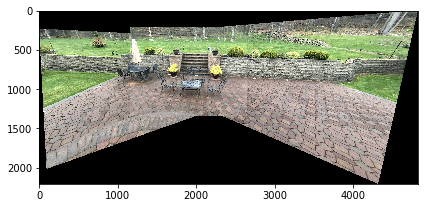

Left Image


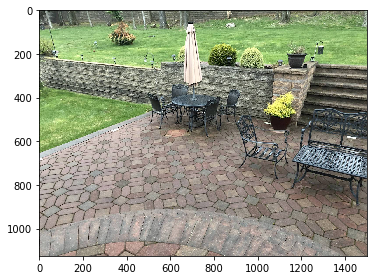

Middle Image


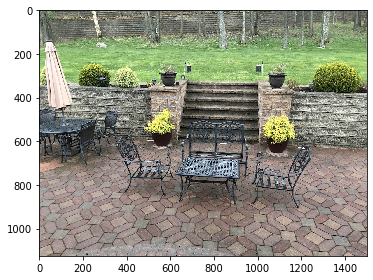

Right Image


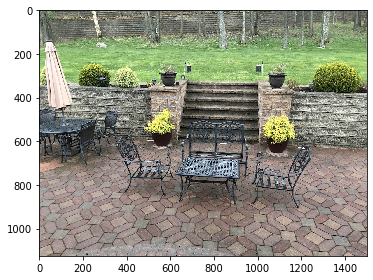

In [93]:
stuff = unclipped_rectify_homography(im1, im2, im3, left_yard_ctrl_pt_lst, right_yard_ctrl_pt_lst)

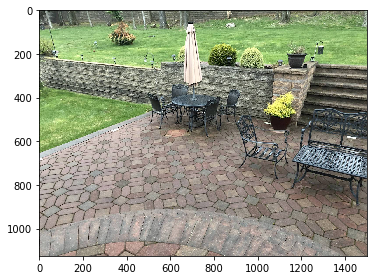

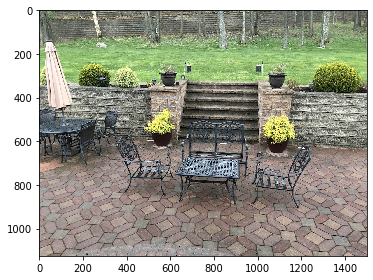

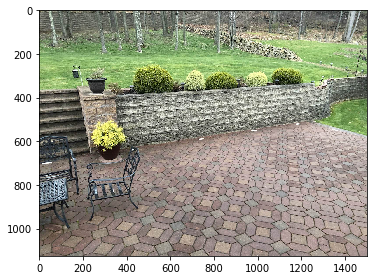

In [65]:
left_yard = "pt1_images/left.jpg"
im1 = skio.imread(left_yard)

middle_yard = "pt1_images/middle.jpg"
im2 = skio.imread(middle_yard)

right_yard = "pt1_images/right.jpg"
im3 = skio.imread(right_yard)

# convert to double (might want to do this later on to save memory)    
im1 = sk.img_as_float(im1)
im2 = sk.img_as_float(im2)
im3 = sk.img_as_float(im3)

skio.imshow(im1)
skio.show()
skio.imshow(im2)
skio.show()
skio.imshow(im3)
skio.show()

In [66]:
im1.shape, im2.shape, im3.shape

((1125, 1500, 3), (1125, 1500, 3), (1125, 1500, 3))

In [12]:
left_yard_ctrl_pt_lst = [{'point_id': 1, 'img1_x': 1161.4787045252883, 'img1_y': 687.491190264926, 'img2_x': 626.848206363291, 'img2_y': 750.2367853973889}, {'point_id': 2, 'img1_x': 1088.2755102040817, 'img1_y': 628.231461528711, 'img2_x': 557.1308784383323, 'img2_y': 704.9205222461657}, {'point_id': 3, 'img1_x': 1213.7667004690074, 'img1_y': 279.6448219039171, 'img2_x': 630.3340727595387, 'img2_y': 363.3056154138676}, {'point_id': 4, 'img1_x': 1074.3320446190899, 'img1_y': 269.1872227151732, 'img2_x': 504.84288249461315, 'img2_y': 352.84801622512373}, {'point_id': 5, 'img1_x': 1171.9363037140322, 'img1_y': 980.303967549753, 'img2_x': 675.6503359107619, 'img2_y': 1039.563696285968}, {'point_id': 6, 'img1_x': 1210.2808340727595, 'img1_y': 900.1290404360503, 'img2_x': 696.5655342882496, 'img2_y': 941.9594371910256}, {'point_id': 7, 'img1_x': 1307.8850931677018, 'img1_y': 1008.1908987197364, 'img2_x': 790.6839269869442, 'img2_y': 1029.1060970972242}, {'point_id': 8, 'img1_x': 1161.4787045252883, 'img1_y': 809.4965141336039, 'img2_x': 644.2775383445305, 'img2_y': 872.2421092660668}, {'point_id': 9, 'img1_x': 1461.2632146026112, 'img1_y': 889.6714412473065, 'img2_x': 902.231651666878, 'img2_y': 882.6997084548107}, {'point_id': 10, 'img1_x': 917.4680567879327, 'img1_y': 718.8639878311575, 'img2_x': 396.7810242109267, 'img2_y': 830.4117125110915}, {'point_id': 11, 'img1_x': 1095.2472429965776, 'img1_y': 771.1519837748766, 'img2_x': 578.0460768158196, 'img2_y': 844.3551780960833}, {'point_id': 12, 'img1_x': 694.3726074280645, 'img1_y': 56.549372544048765, 'img2_x': 48.194384586132855, 'img2_y': 140.2101660539995}, {'point_id': 13, 'img1_x': 1279.9981619977184, 'img1_y': 234.32855875269388, 'img2_x': 686.107935099506, 'img2_y': 317.9893522626444}, {'point_id': 14, 'img1_x': 1259.0829636202307, 'img1_y': 450.45227532006606, 'img2_x': 689.5938014957537, 'img2_y': 513.1978704525291}, {'point_id': 15, 'img1_x': 903.5245912029409, 'img1_y': 520.169603245025, 'img2_x': 354.9506274559517, 'img2_y': 621.259728736215}, {'point_id': 17, 'img1_x': 1063.874445430346, 'img1_y': 928.0159716060339, 'img2_x': 567.5884776270759, 'img2_y': 1008.1908987197364}, {'point_id': 18, 'img1_x': 795.4627329192548, 'img1_y': 900.1290404360503, 'img2_x': 271.2898339460012, 'img2_y': 1060.4788946634555}, {'point_id': 19, 'img1_x': 666.485676258081, 'img1_y': 851.3269108885792, 'img2_x': 110.93997971859585, 'img2_y': 1050.0212954747117}, {'point_id': 20, 'img1_x': 774.547534541767, 'img1_y': 575.9434655849918, 'img2_x': 219.00183800228206, 'img2_y': 701.4346558499177}, {'point_id': 21, 'img1_x': 683.9150082393206, 'img1_y': 555.0282672075043, 'img2_x': 107.4541133223479, 'img2_y': 690.977056661174}]
#cpselect(left_yard, middle_yard)
print(left_yard_ctrl_pt_lst)

[{'point_id': 1, 'img1_x': 1161.4787045252883, 'img1_y': 687.491190264926, 'img2_x': 626.848206363291, 'img2_y': 750.2367853973889}, {'point_id': 2, 'img1_x': 1088.2755102040817, 'img1_y': 628.231461528711, 'img2_x': 557.1308784383323, 'img2_y': 704.9205222461657}, {'point_id': 3, 'img1_x': 1213.7667004690074, 'img1_y': 279.6448219039171, 'img2_x': 630.3340727595387, 'img2_y': 363.3056154138676}, {'point_id': 4, 'img1_x': 1074.3320446190899, 'img1_y': 269.1872227151732, 'img2_x': 504.84288249461315, 'img2_y': 352.84801622512373}, {'point_id': 5, 'img1_x': 1171.9363037140322, 'img1_y': 980.303967549753, 'img2_x': 675.6503359107619, 'img2_y': 1039.563696285968}, {'point_id': 6, 'img1_x': 1210.2808340727595, 'img1_y': 900.1290404360503, 'img2_x': 696.5655342882496, 'img2_y': 941.9594371910256}, {'point_id': 7, 'img1_x': 1307.8850931677018, 'img1_y': 1008.1908987197364, 'img2_x': 790.6839269869442, 'img2_y': 1029.1060970972242}, {'point_id': 8, 'img1_x': 1161.4787045252883, 'img1_y': 809.4

In [14]:
right_yard_ctrl_pt_lst = [{'point_id': 1, 'img1_x': 241.20997591583216, 'img1_y': 959.3887691722654, 'img2_x': 982.4065787805807, 'img2_y': 882.6997084548107}, {'point_id': 3, 'img1_x': 453.84782608695656, 'img1_y': 903.6149068322983, 'img2_x': 1191.5585625554572, 'img2_y': 896.6431740398024}, {'point_id': 4, 'img1_x': 408.5315629357333, 'img1_y': 1011.6767651159844, 'img2_x': 1132.2988338192422, 'img2_y': 983.7898339460008}, {'point_id': 5, 'img1_x': 464.3054252757004, 'img1_y': 684.005323868678, 'img2_x': 1247.332424895424, 'img2_y': 677.0335910761821}, {'point_id': 6, 'img1_x': 614.1976803143618, 'img1_y': 952.4170363797695, 'img2_x': 1362.366015971606, 'img2_y': 1008.1908987197364}, {'point_id': 8, 'img1_x': 662.999809861833, 'img1_y': 1022.1343643047283, 'img2_x': 1411.1681455190774, 'img2_y': 1105.7951578146788}, {'point_id': 9, 'img1_x': 544.480352389403, 'img1_y': 858.2986436810751, 'img2_x': 1292.6486880466473, 'img2_y': 882.6997084548107}, {'point_id': 10, 'img1_x': 488.7064900494359, 'img1_y': 781.6095829636204, 'img2_x': 1240.3606921029282, 'img2_y': 792.0671821523642}, {'point_id': 11, 'img1_x': 554.9379515781469, 'img1_y': 1043.0495626822158, 'img2_x': 1282.1910888579037, 'img2_y': 1074.4223602484474}, {'point_id': 13, 'img1_x': 356.2435669920142, 'img1_y': 391.192546583851, 'img2_x': 1170.6433641779695, 'img2_y': 370.2773482063635}, {'point_id': 14, 'img1_x': 202.86544555710486, 'img1_y': 398.16427937634694, 'img2_x': 1027.722841931804, 'img2_y': 366.79148181011556}, {'point_id': 15, 'img1_x': 129.6622512358981, 'img1_y': 575.9434655849918, 'img2_x': 944.0620484218534, 'img2_y': 523.6554696412729}, {'point_id': 16, 'img1_x': 600.2542147293701, 'img1_y': 837.3834453035875, 'img2_x': 1358.8801495753582, 'img2_y': 882.6997084548107}, {'point_id': 17, 'img1_x': 140.11985042464192, 'img1_y': 994.2474331347447, 'img2_x': 902.231651666878, 'img2_y': 886.1855748510586}, {'point_id': 18, 'img1_x': 133.148117632146, 'img1_y': 861.784510077323, 'img2_x': 912.689250855622, 'img2_y': 767.6661173786287}, {'point_id': 19, 'img1_x': 638.5987450880974, 'img1_y': 750.2367853973889, 'img2_x': 1418.1398783115733, 'img2_y': 802.524781341108}, {'point_id': 20, 'img1_x': 582.8248827481303, 'img1_y': 697.9487894536699, 'img2_x': 1355.3942831791105, 'img2_y': 729.3215870199012}, {'point_id': 21, 'img1_x': 443.3902268982127, 'img1_y': 1102.3092914184308, 'img2_x': 1153.21403219673, 'img2_y': 1084.8799594371912}]
#cpselect(right_yard, middle_yard)
print(right_yard_ctrl_pt_lst)

[{'point_id': 1, 'img1_x': 241.20997591583216, 'img1_y': 959.3887691722654, 'img2_x': 982.4065787805807, 'img2_y': 882.6997084548107}, {'point_id': 3, 'img1_x': 453.84782608695656, 'img1_y': 903.6149068322983, 'img2_x': 1191.5585625554572, 'img2_y': 896.6431740398024}, {'point_id': 4, 'img1_x': 408.5315629357333, 'img1_y': 1011.6767651159844, 'img2_x': 1132.2988338192422, 'img2_y': 983.7898339460008}, {'point_id': 5, 'img1_x': 464.3054252757004, 'img1_y': 684.005323868678, 'img2_x': 1247.332424895424, 'img2_y': 677.0335910761821}, {'point_id': 6, 'img1_x': 614.1976803143618, 'img1_y': 952.4170363797695, 'img2_x': 1362.366015971606, 'img2_y': 1008.1908987197364}, {'point_id': 8, 'img1_x': 662.999809861833, 'img1_y': 1022.1343643047283, 'img2_x': 1411.1681455190774, 'img2_y': 1105.7951578146788}, {'point_id': 9, 'img1_x': 544.480352389403, 'img1_y': 858.2986436810751, 'img2_x': 1292.6486880466473, 'img2_y': 882.6997084548107}, {'point_id': 10, 'img1_x': 488.7064900494359, 'img1_y': 781.6

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Original Image


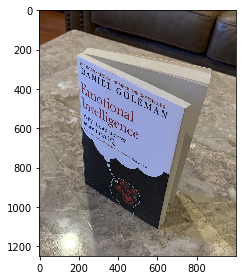

Output Image


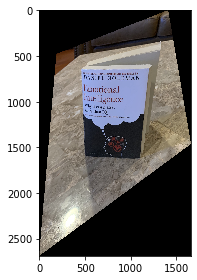

Goal Image


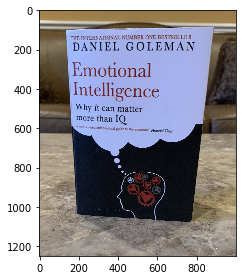

In [70]:
stuff = unclipped_rectify_homography(im2, im1, book_controlpointlist)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Original Image


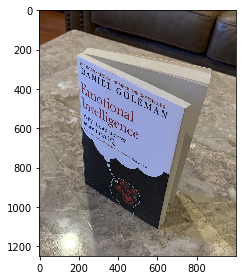

Output Image


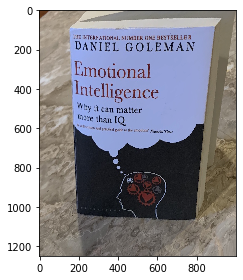

Goal Image


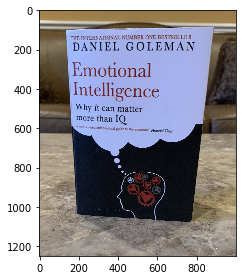

In [10]:
stuff = rectify_homography(im2, im1, book_controlpointlist)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Saved:  final_physics2.jpg !
Original Image


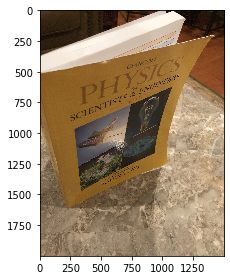

Output Image


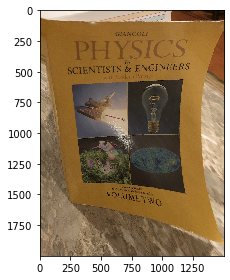

Goal Image


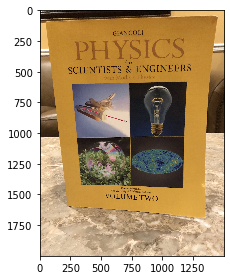

In [11]:
stuff = rectify_homography(im4, im3, n_controlpointlist, save_name="final_physics2.jpg")

In [3]:
H = np.matrix([
    [0.54000000,0.04900000,2684.91000],
    [-0.2200000,      0.87000000,    347.250000],
    [-0.0000830,      -0.0000051,     1.00000000]
])

In [4]:
H

matrix([[ 5.40000e-01,  4.90000e-02,  2.68491e+03],
        [-2.20000e-01,  8.70000e-01,  3.47250e+02],
        [-8.30000e-05, -5.10000e-06,  1.00000e+00]])

In [21]:
def verify(H, x, y, x_target, y_target):
    input_vec = np.matrix([
        [x],
        [y],
        [1]
    ])
    
    output = np.dot(H, input_vec)
    
    multiplier = output[2,0]
    
    output = output[:2,:]
    
    output = output / multiplier
    
    x_result = output[0,0]
    y_result = output[1,0]
    
    
    print(x_target, y_target)
    print(x_result, y_result)
    
    return abs(x_result - x_target) < 2.5 and abs(y_result - y_target) < 2.5
    

In [22]:
verify(H, 2330.21,2789.38, 5147.20,2852.93)

5147.2 2852.93
5149.008477049488 2853.936578447869


True

In [23]:
verify(H, 1985.31,1723.32,3841.42,1440.97)

3841.42 1440.97
4648.207965472826 1705.8548496800222


False

In [24]:
verify(H, 877.44,2245.9, 3268.78,2108.14)

3268.78 2108.14
3569.6309429801886 2302.1774194138443


False

In [25]:
verify(H, 2351.11,2789.38,5172.76,2256.77)

5172.76 2256.77
5174.580404554113 2854.3827073274965


False

In [26]:
verify(H, 542.98,667.71, 3163.99,849.84)

3163.99 849.84
3164.2149064936116 849.8989643848794


True

In [27]:
verify(H, 1180.53,2360.87, 3862.09,2405.60)

3862.09 2405.6
3863.115948689077 2406.234918090274


True

In [28]:
verify(H, 62.61,2026.42, 1861.60,2129.12)

1861.6 2129.12
2862.4720990093347 2129.535812897432


False

In [29]:
verify(H, 72.66,876.74, 2796.23,1105.54)

2796.23 1105.54
2796.475678230026 1105.6402036877198


True